In [1]:
import pandas as pd
import json
import numpy as np
import random
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torch.nn.functional as F

### FWHM = 0.1 implies the values below

In [2]:
#Standard deviation and x-values of energy spectrum
#0.1 ev
sigma = 0.1 
Denom = 2*(0.01/(8*np.log(2))) 

### Feature size = 1, Output layer = 500 perceptrons

In [3]:
n_output = 500
n_input = 1

### Create array of randomized eigenvalues using torch.rand;

In [4]:
#Random eigenvalues from -6 to 6
eigen_arr = torch.rand(100)*6- torch.rand(100)*6 

In [5]:
max(eigen_arr), min(eigen_arr)

(tensor(5.6951), tensor(-4.8241))

### Model has 100 hidden layer perceptrons

In [7]:
class Gauss(nn.Module):
        
        def __init__(self, n_feature, n_hidden, n_output):
            super(Gauss, self).__init__()
            self.hidden = torch.nn.Linear(n_feature, n_hidden) 
            self.predict = torch.nn.Linear(n_hidden, n_output)  
            
        def forward(self, x):
            x = F.elu(self.hidden(x))            
            x = self.predict(x)             
            return x 
model = Gauss(n_feature=n_input, n_hidden=100, n_output= n_output) 
loss_func = torch.nn.MSELoss() 

In [8]:
optimizer = torch.optim.SGD( model.parameters(), lr=  0.1)

train_loss = []
pred_arr = []
EPOCHS = 500 
#Forloop for now used in lieu of direct input of eigen_arr to avoid size mismatching between layers for time being
for j in range(len(eigen_arr)):
    #Generates the training data for each eigenvalue
    Z_j = torch.unsqueeze(torch.linspace(-6,6,n_output), dim = 1) - eigen_arr[j]
    
    y_training = torch.exp(-Z_j.pow(2)/(  Denom ), out=None)
    
    #Trains the data on each eigenvalue in the array
    for i in range(1,EPOCHS+1): 
    
        model.train()
    
        pred = model(eigen_arr[j].reshape(1))   
         
    
        loss = loss_func(pred.reshape(1,n_output) , y_training.reshape(n_input,n_output) )   
     
    
        optimizer.zero_grad()    
        loss.backward() 
    
        optimizer.step()
    pred_arr.append(pred.data)        

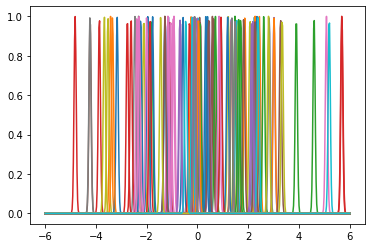

In [10]:
X = np.linspace(-6,6,500)
for i in range(len(eigen_arr)):
    plt.plot(X,pred_arr[i].data )

### Generate a random test eigenvalue to make a prediction on

In [11]:
testdata = torch.rand(1)
testdata

tensor([0.7595])

In [12]:
Z_test = torch.unsqueeze(torch.linspace(-6,6,n_output), dim = 1) - testdata
y_test = torch.exp(-Z_test.pow(2)/(  Denom ), out=None)

for i in range(1,500): 
    
        model.eval()
    
        test = model(testdata)   
         
    
        loss = loss_func(test.reshape(n_input,n_output) , y_test.reshape(n_input,n_output) )   
     
    
        optimizer.zero_grad()    
        loss.backward() 
    
        optimizer.step()

### Result of prediction on random test eigenvalue

([<matplotlib.lines.Line2D at 0x7f6ca0fa4c90>],
 tensor(0.9985),
 tensor([0.9989]),
 tensor([0.7595]))

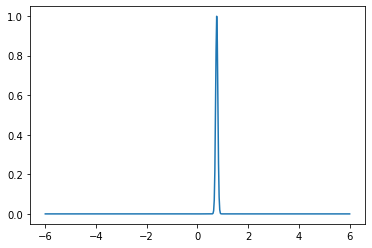

In [13]:
plt.plot(X,test.data), max(test.data), max(y_test.data), testdata